# **Mounting Drive Content**

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#pip uninstall matplotlib

In [3]:
#pip install matplotlib --user
!pip install numpy==1.19.0

  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [203 lines of output]
  Running from numpy source directory.
  <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\devin\AppData\Local\Temp\pip-install-eq51jxxh\numpy_79009b9733514bd883940fa52f50ac3e\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\devin\AppData\Local\Temp\pip-install-eq51jxxh\numpy_79009b9733514bd883940fa52f50ac3e\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_

# **Importing the Library**

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
tf.__version__

'2.5.2'

import os
import time
x=!nvidia-smi
count=0
for i in x:
    if "============" in i:
        count+=1
        break
    count+=1
if 'p100' in x[count].lower():
    print("found")
else:
    print(x[count])
    time.sleep(1)
    #os._exit(00)

# **Image Data Exploration**

# **Leaf  Data**

In [6]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'input/train'
test_path = 'input/test'

# **Image Processing & Scaling**

In [7]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 135 images belonging to 3 classes.
Found 135 images belonging to 3 classes.


# **Deep Learning Model**

# **InceptionV3**

In [9]:
mob = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
x1= Flatten()(mob.output)
prediction1 = Dense(3, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=150, steps_per_epoch=len(train_set), validation_steps=len(test_set))

C:\Users\devin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
5/5 [==============================] - 70s 11s/step - loss: 4.0260 - accuracy: 0.5481 - val_loss: 3.8520 - val_accuracy: 0.6444
Epoch 2/150
5/5 [==============================] - 51s 10s/step - loss: 0.9402 - accuracy: 0.7926 - val_loss: 3.3791 - val_accuracy: 0.5778
Epoch 3/150
5/5 [==============================] - 47s 9s/step - loss: 0.8431 - accuracy: 0.7852 - val_loss: 16.9087 - val_accuracy: 0.4444
Epoch 4/150
5/5 [==============================] - 50s 10s/step - loss: 0.3585 - accuracy: 0.8593 - val_loss: 58.7726 - val_accuracy: 0.4444
Epoch 5/150
5/5 [==============================] - 48s 10s/step - loss: 0.2349 - accuracy: 0.9259 - val_loss: 321.3588 - val_accuracy: 0.3556
Epoch 6/150
5/5 [==============================] - 45s 11s/step - loss: 0.2158 - accuracy: 0.9481 - val_loss: 912.4582 - val_accuracy: 0.3259
Epoch 7/150
5/5 [==============================] - 41s 10s/step - loss: 0.2056 - accuracy: 0.9259 - val_loss: 704.8834 - val_accuracy: 0.3407
Epoch 8/150
5

Epoch 115/150
5/5 [==============================] - 43s 8s/step - loss: 1.4253 - accuracy: 0.6000 - val_loss: 193.9860 - val_accuracy: 0.5704
Epoch 116/150
5/5 [==============================] - 41s 8s/step - loss: 0.9157 - accuracy: 0.6593 - val_loss: 148.7273 - val_accuracy: 0.5852
Epoch 117/150
5/5 [==============================] - 41s 10s/step - loss: 0.8831 - accuracy: 0.6444 - val_loss: 125.5616 - val_accuracy: 0.5333
Epoch 118/150
5/5 [==============================] - 41s 10s/step - loss: 0.7812 - accuracy: 0.6741 - val_loss: 100.1600 - val_accuracy: 0.5037
Epoch 119/150
5/5 [==============================] - 41s 8s/step - loss: 0.7314 - accuracy: 0.7111 - val_loss: 74.1482 - val_accuracy: 0.5111
Epoch 120/150
5/5 [==============================] - 41s 8s/step - loss: 0.6828 - accuracy: 0.7778 - val_loss: 57.0766 - val_accuracy: 0.5185
Epoch 121/150
5/5 [==============================] - 41s 8s/step - loss: 0.8618 - accuracy: 0.7407 - val_loss: 7.3586 - val_accuracy: 0.5556
E

import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model12.save('model12.h5')

# **InceptionResNetV2**

In [24]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [26]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [3]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit_generator(train_set, validation_data=test_set, epochs=150, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

NameError: name 'modelss' is not defined

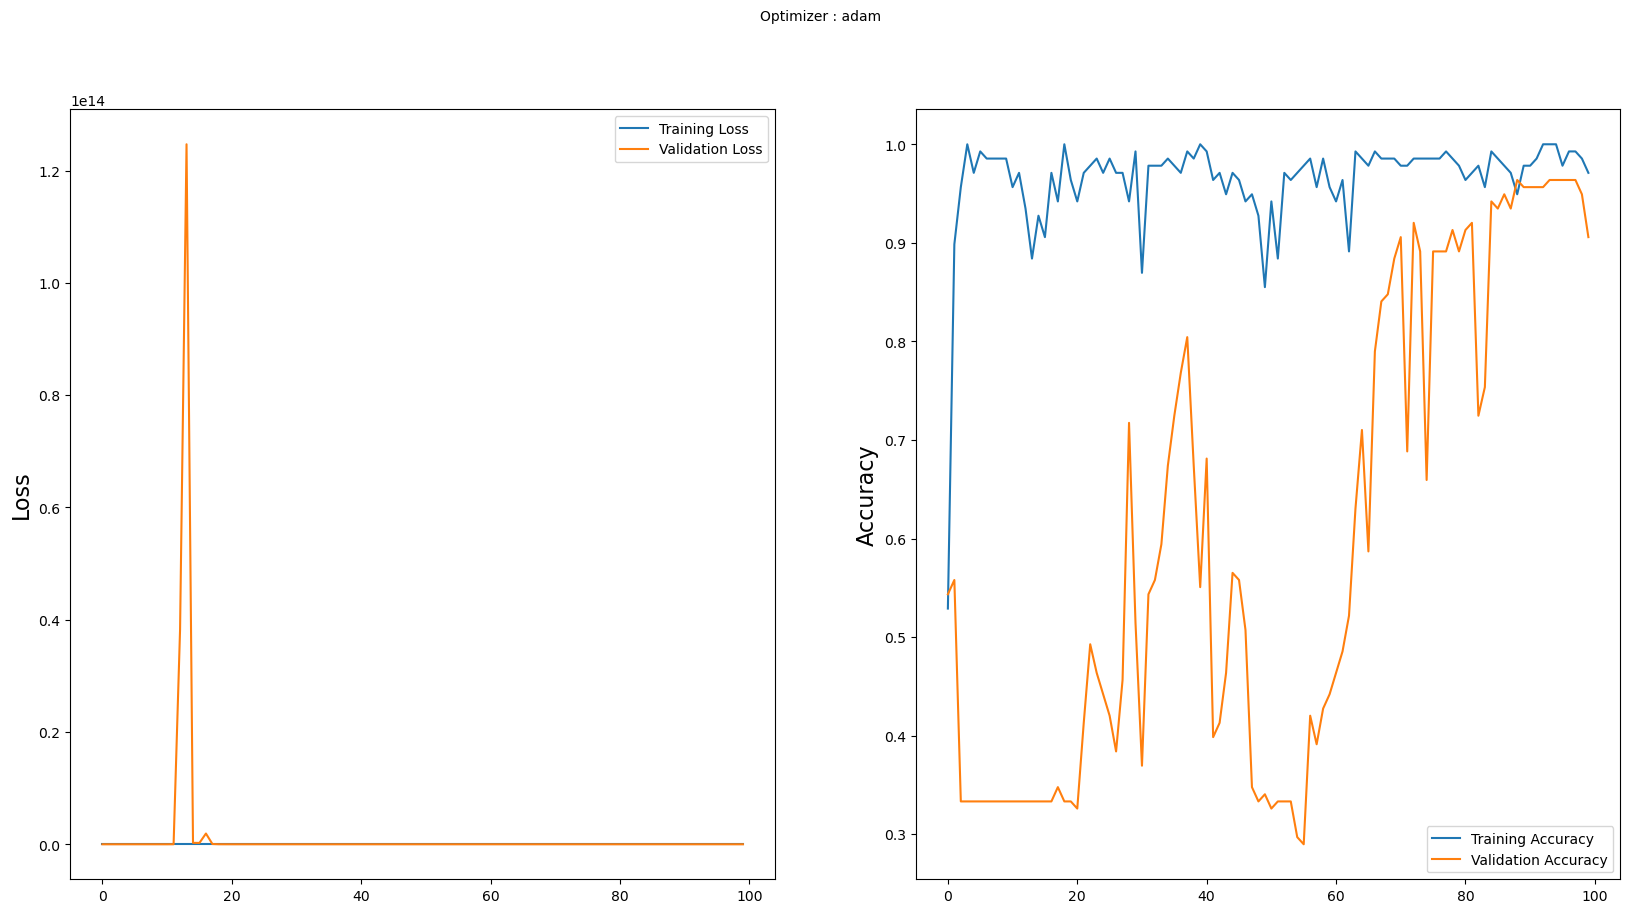

In [28]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Model Saving For Leaf Disease**

In [29]:
modelss.save('model.h5')

In [30]:
#model12.save('model112.h5')